In [ ]:

__author__ = "Srinivasan Subramaniam"
__copyright__ = "None"
__credits__ = ["Multiple Books, Course Content-Coursera Advanced Data Science "]
__license__ = "GPL"
__version__ = "1.0.0"
__maintainer__ = "Srinivasan Subramaniam"
__email__ = "srinivsu@in.ibm.com"
__status__ = "Production"

In [55]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# SKLearn related libraries
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8


# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Keras NN related libraries
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model, Sequential 
from keras import regularizers
from keras.optimizers import RMSprop,Adam

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ff0292826d3c4c4b82e354bd814f2cc4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kmHwFPzzXy5rSouB1boPKDggVAMizFgHFjuLBePhy0_n',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ff0292826d3c4c4b82e354bd814f2cc4.get_object(Bucket='default-donotdelete-pr-ov7ux1hsokt60t',Key='creditcard.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df_data_1.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
df_data1_sample= df_data_1.sample(frac = 0.1,random_state=1)

df_data1_sample.shape

(28481, 31)

In [5]:
df_data_1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df_data_1.shape

(284807, 31)

Check for missing values in the dataset

In [7]:
df_data_1.isnull().values.any()

False

##Data Exploration

In [8]:
pd.value_counts(df_data_1['Class'],normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

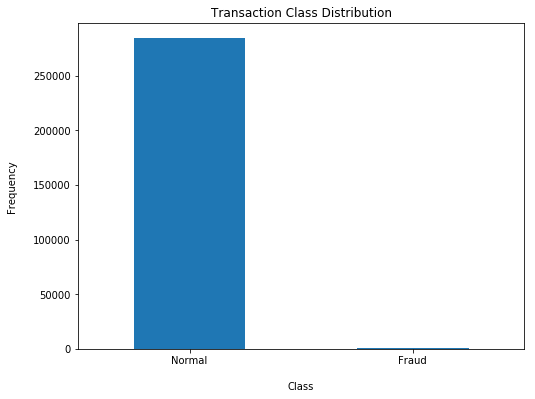

In [18]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df_data_1['Class'], sort = True)
count_classes.plot(kind='bar', figsize=(8, 6),rot=0)
#count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class",labelpad=16)
plt.ylabel("Frequency",labelpad=16);



From the above, it is very clear that data set is heavily skewed. Less than one percent of fraudently labeled data.

In [9]:
fraud = df_data_1[df_data_1['Class']==1]

normal = df_data_1[df_data_1['Class']==0]

fraud.shape


(492, 31)

In [10]:
normal.shape

(284315, 31)

In [22]:
#We now check how different are the amount of money used in different transaction classes
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

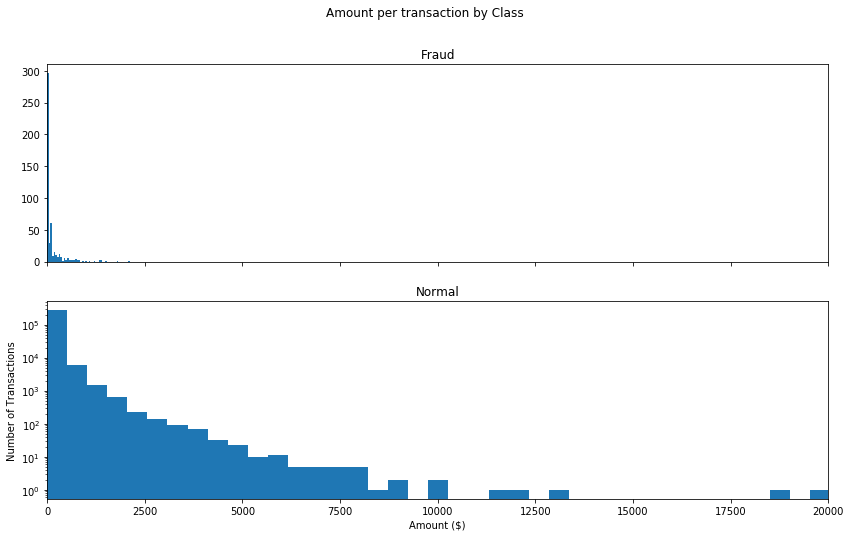

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by Class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

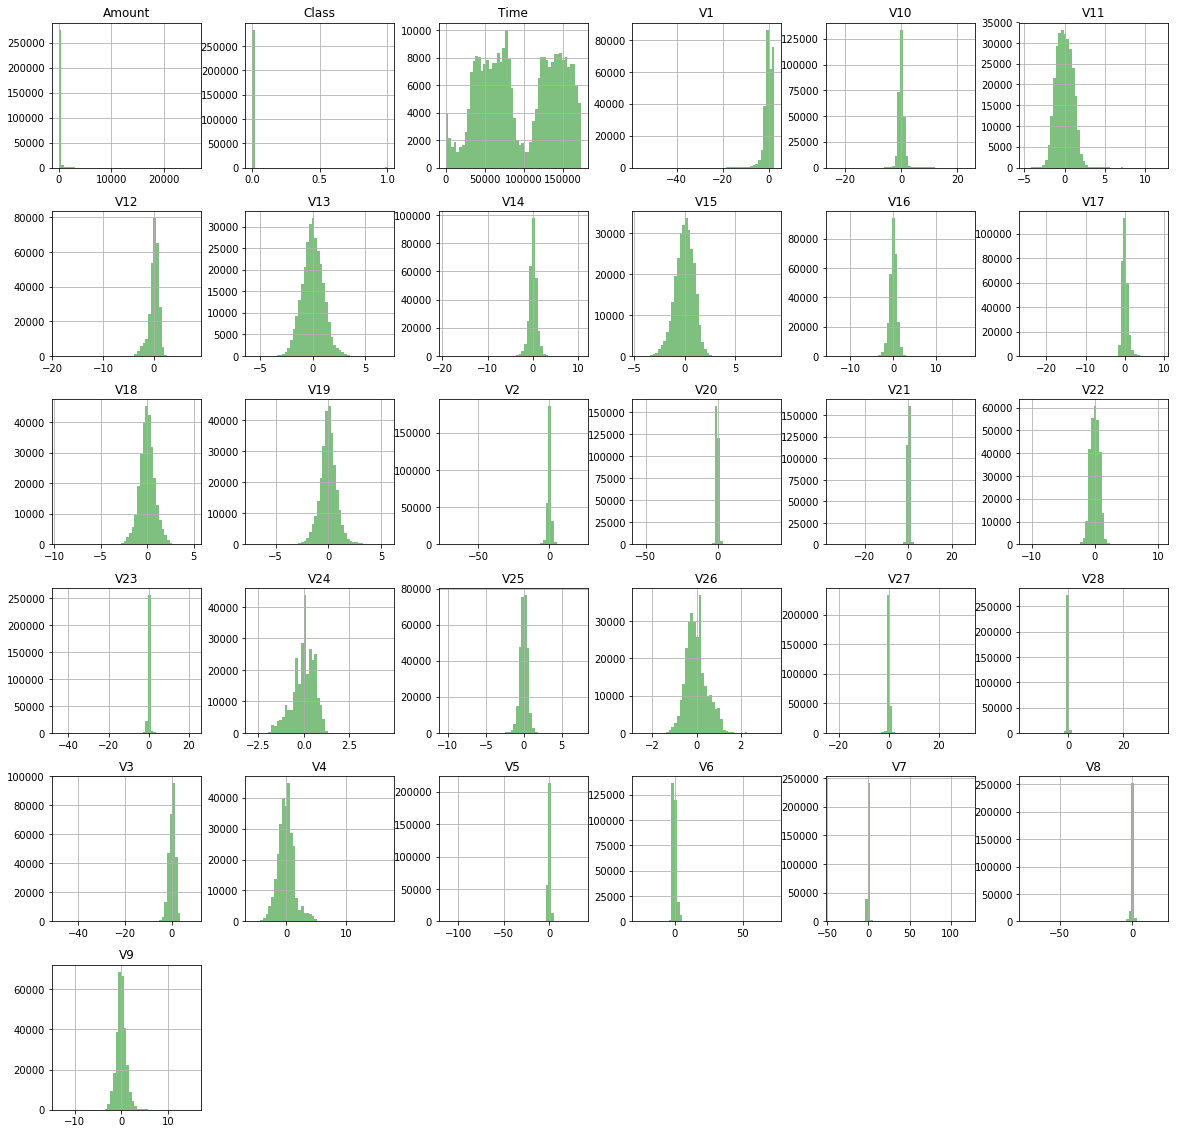

In [24]:
#Visualizing each feature separately
df_data_1.hist(figsize=(20,20), bins=50, color="green", alpha=0.5)
plt.show()

Correlation Matrix
-------------------
The below correlation matrix shows that none of the V1 to V28 PCA components have any correlation with one another.
however  we observe Class has some form positive and negative correlations with the V components 
but has no correlation with Time and Amount.

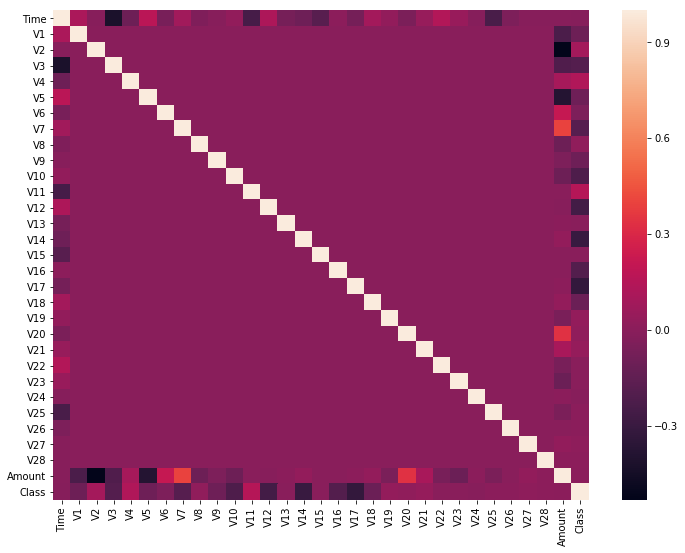

In [36]:
correlation_matrix = df_data_1.corr()
fig = plt.figure(figsize=(12,9))
#sns.heatmap(correlation_matrix,vmax=0.8,square = True,cmap= 'coolwarm')
sns.heatmap(correlation_matrix)
plt.show()

Dimensionality Reduction - only for visualization purpose and achieved using t-SNE
-------------------------------------------------------
When working with a dataset having lot features, it is to understand or explore the relationships between the features. It makes the Exploratory Data Analytics process difficult and it also affects the machine learning model’s performance since the chances model might get ovefritted overfit or violate some of the assumptions of the algorithm.  This is where dimensionality reduction comes in. In machine learning, dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. By reducing the dimension of your feature space, you have fewer relationships between features to consider which can be explored and visualized easily and also you are less likely to overfit your mode

 t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.Here we have more than 20 features. Visualizing the various dimensions

t-SNE is very time consuming and it directly relates to the amount of the data given to it. Performing it on 284807 transactions is not practical given the memory configuration deficiency, hence, I am only taking a fraction of it, which corresponds to around 15000 examples

In [11]:
tsne_data_fraud = df_data_1[df_data_1.Class==1]
tsne_data_normal = df_data_1[df_data_1.Class==0].sample(frac=0.10, random_state=1)
print(tsne_data_fraud.shape)
print(tsne_data_normal.shape)

(492, 31)
(28432, 31)


Feature Engineering for t-SNE

In [16]:
tsne_data = tsne_data_fraud.append(tsne_data_normal, ignore_index=True)
tsne_data = shuffle(tsne_data)
label = tsne_data.iloc[:, -1]
tsne_data = tsne_data.iloc[:, :30]
tsne_data = tsne_data.astype(np.float64)

standard_scaler = StandardScaler()
tsne_data = standard_scaler.fit_transform(tsne_data)

print(tsne_data.shape)
print(label.shape) 

(28924, 30)
(28924,)


In [17]:
#Performing Dimension Reduction
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(tsne_data)  # Note this is an extremely CPU intensive task. Will take time to complete.

#Making final changes to the resulted data from tsne
print(tsne_data.shape)
tsne_plot = np.vstack((tsne_data.T, label))
tsne_plot = tsne_plot.T
print(tsne_plot.shape)

(28924, 2)
(28924, 3)


/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


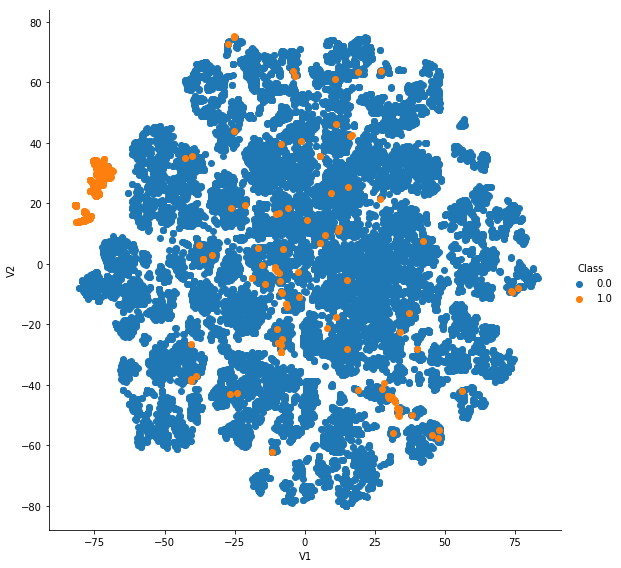

In [19]:
#Plotting the tsne results
tsne_plot = pd.DataFrame(data=tsne_plot, columns=("V1", "V2", "Class"))
sns.FacetGrid(tsne_plot, size=8, hue="Class").map(plt.scatter, "V1", "V2").add_legend()

It is obvious from the above anomilies are clustered together in groups. We need an  anomaly detection technique and train it to identify those points as outliers and hence brand them as anomalies.

Model Fitting :
----------------
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.
The article below gives a simple explanation to adoption of anomoly detection using Isolation Forest
https://blog.easysol.net/using-isolation-forests-anamoly-detection/
    

In [26]:
columns = df_data1_sample.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = df_data1_sample[columns]
Y = df_data1_sample[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [37]:
# Let us determine the outlier fraction in the sample set we have taken
fraud_sample = df_data1_sample[df_data1_sample['Class']==1]
valid_sample = df_data1_sample[df_data1_sample['Class']==0]
outlier_fraction = len(fraud_sample)/float(len(valid_sample))
print(outlier_fraction)

0.0017234102419808666


n_estimators: The number of trees to use. Usual Recommendation is 100 trees, because the path lengths usually converges well before that.

max_samples: The number of samples to draw while build a single tree. This parameter is called sub-sampeling , since it generally provides enough details to perform anomaly detection across a wide range of data.

contamination: The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function. 

In [38]:
mdl = IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction,random_state=state, verbose=0)

In [41]:
mdl.fit(X)
scores_prediction = mdl.decision_function(X)
y_pred = mdl.predict(X)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


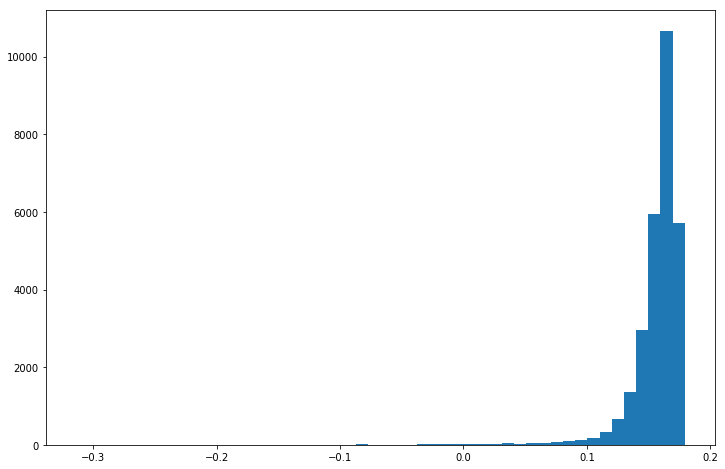

In [44]:
plt.figure(figsize=(12, 8))
plt.hist(scores_prediction, bins=50);

From the figure above, see the value between 0 and -0.1.There is a clear cluster under -0.1
We consider average path lengths shorter than -0.1 as anomalies.

Accuracy Assesment and Scoring
----------------------------

In [43]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format("Isolation Forest",n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 49
Accuracy Score :
0.9982795547909132
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Summarization of the output from the Isolation Forest Model
---------------------------------------------------------
Isolation Forest detected 49 errors 
Isolation Forest has a 99.82% 

We can also improve on this accuracy by increasing the sample size or use deep learning algorithms (Auto Encoder)
however at the cost of computational expense.


Anomoly Detection using Auto Encoders
------------------------------------
Auto Encoders are neural networks that have ability to discover low dimensional representation of high dimensional data 
and are able to reconstruct the input from the neural network output. The Encoder reduces the dimensionality of high dimensional data set to a low dimensional one where as a decoder expands
the low dimenisonal data into a high dimension one.

If Neural network is good , there is a good chance of reconstructing the original input from the encoded data.

The entire network is usually trained as a whole. The loss function is usually MSE (Mean Squared Error) or Cross Entropy Loss
Encoder attempts to preserve as much relevant information as needed and discards ir-relevant one. This charectrestic
is leveraged in anomoly detection

Currently a Simple AutoEncoder is demonstrated. It can be enhanced to below for structured data as this 
creditcard sample is.
1. Sparse Auto Encoder
2. Deep Auto Encoder


In [49]:
# Let us develop a visualization helper class which can allow us to visualize training and anomolies 
class VisualizationHelper:
    labels=["Normal","Fraud"]
    
    def draw_confusion_matrix(self,y,ypred):
        matxix=confusion_matrix(y,ypred)
        plt.figure(figsize=(12,10))
        colors="orange","green"
        sns.heatmap(matrix,xticklabels=self.labels,ytickslabels=self.labels,cmap=colors,annot=True,fmt="d")
        plt.title("Confusion Matrix")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.show()
        
    def draw_anomaly(self,y,error,threshold):
        groupSDF=pd.DataFrame({'error':error,'true':y}).groupby('true')
        figure,axes=plt.subplots(figsize=(12,8))
        for name,group in groupSDF:
            axes.plot(group.index,group.error,marker='x'if name == 1 else 'o',linestyle='',color='r' if name == 1 else 'g',label='Fraud' if name==1 else 'Normal')
        axes.hlines(threshold,axes.get_xlim()[0],axes.get_xlim()[1],colors='b',zorder=100,label='Threshold')
        axes.legend()
        plt.title("Fraud")
        plt.ylabel("Error")
        plt.xlabel("Data")
        plt.show()
        
    def draw_error(self,error,threshold):
        plt.plot(error,marker='o',ms=3.5,linestyle='',label='Point')
        plt.hlines(threshold,xmin=0,xmax=len(error)-1,colors='b',zorder=100,label='Threshold')
        plt.legend()
        plt.title("Reconstruction Error of the Autoencoder")
        plt.ylabel("Error")
        plt.xlabel("Data")
        plt.show()

We plan to use 25000 normal and 400 fraudulent records. Too much abnormal data in training             
will train the autoencoder to show that anomolies are actually normal, which is not what we want.

Feature Engineering for AutoEncoder
---------------------------------------

In [50]:
df_data_1['Amount']=StandardScaler().fit_transform(df_data_1['Amount'].values.reshape(-1,1))
df0=df_data_1.query('Class == 0').sample(25000)
df1=df_data_1.query('Class ==1').sample(400)
df=pd.concat([df0,df1])
df.shape

(25400, 31)

On a 80-20 basis, do the train test split the pandas dataframe. From the original dataset, two columns are dropped
'Class' and 'Time'. As seen above, time is not contributing much to anomoly. Class is the label

In [51]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(labels=['Time','Class'],axis=1),df['Class'],test_size=0.2,random_state=42)
print(x_train.shape,'Training Sample Shape')
print(x_test.shape,'Testing Sample Shape')

(20320, 29) Training Sample Shape
(5080, 29) Testing Sample Shape


Auto Encoder Model Building
-----------------------------
We are creating a simple neural network with just one encoder and decoder layer.We will encode the 29 
columns (after dropping 2 columns) from the creditcard data-set into 12 features using the encoder.
Decoder then expands the 12 back into 29 columns.

RELU is the activation function at input layer and softmax is used at the output layer 
RMS Prop is the optimizer
Mean Squared Error for loss computation

We have used the functional api of keras instead of Sequential as it is more flexible

In [53]:
encoding_dimension=12
input_dim=x_train.shape[1] #29 in this case
inputArray=Input(shape=(input_dim,))
encoded = Dense(encoding_dimension,activation='relu')(inputArray)
decoded = Dense(input_dim,activation='softmax')(encoded)
autoencoder=Model(inputArray,decoded)
autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 29)                377       
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [56]:
autoencoder.compile(optimizer=RMSprop(),loss="mean_squared_error",metrics=['mae','accuracy'])

Training the Autoencoder
-------------------------

In [57]:
batch_size=32
epochs=25
history=autoencoder.fit(x_train,x_train,batch_size=batch_size,epochs=epochs,verbose=1,shuffle=True,validation_data=(x_test,x_test))

Instructions for updating:
Use tf.cast instead.
Train on 20320 samples, validate on 5080 samples
Epoch 1/25
20320/20320 [==============================] - 6s 306us/step - loss: 1.3804 - mean_absolute_error: 0.6660 - acc: 0.3057 - val_loss: 1.4319 - val_mean_absolute_error: 0.6527 - val_acc: 0.5423
Epoch 2/25
20320/20320 [==============================] - 6s 283us/step - loss: 1.3265 - mean_absolute_error: 0.6474 - acc: 0.5743 - val_loss: 1.4185 - val_mean_absolute_error: 0.6485 - val_acc: 0.6177
Epoch 3/25
20320/20320 [==============================] - 5s 262us/step - loss: 1.3197 - mean_absolute_error: 0.6457 - acc: 0.6431 - val_loss: 1.4150 - val_mean_absolute_error: 0.6479 - val_acc: 0.6642
Epoch 4/25
20320/20320 [==============================] - 6s 290us/step - loss: 1.3166 - mean_absolute_error: 0.6453 - acc: 0.6852 - val_loss: 1.4130 - val_mean_absolute_error: 0.6476 - val_acc: 0.6915
Epoch 5/25
20320/20320 [==============================] - 5s 258us/step - loss: 1.3149 - mean_a

Model Evaluation
----------

In [58]:
score_autoencoder=autoencoder.evaluate(x_test,x_test,verbose=1)
print("Test Loss:",score_autoencoder[0])
print("Test Accuracy:",score_autoencoder[1])

5080/5080 [==============================] - 1s 144us/step
Test Loss: 1.407900355181356
Test Accuracy: 0.6468933248144435


In [60]:
## Now let us detect and plot the anomolies
# Difference between actual and error is compared against the threshold


In [70]:
new_threshold=40.0
y_pred=autoencoder.predict(x_test)
y_dist=np.linalg.norm(x_test -y_pred,axis=1)
z=zip(y_dist >= new_threshold,y_dist)
y_label=[]
error=[]
for inx ,(is_anomoly,y_dist) in enumerate(z):
    if is_anomoly:
        y_label.append(1)
    else:
        y_label.append(0)
    error.append(y_dist)

In [71]:
print(classification_report(y_test,y_label))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5007
           1       0.77      0.27      0.40        73

   micro avg       0.99      0.99      0.99      5080
   macro avg       0.88      0.64      0.70      5080
weighted avg       0.99      0.99      0.99      5080



In [ ]:
### We also see that when thresholds is set to around 30, precision and recall score is far better

Let us view the anomolies
----------------------------

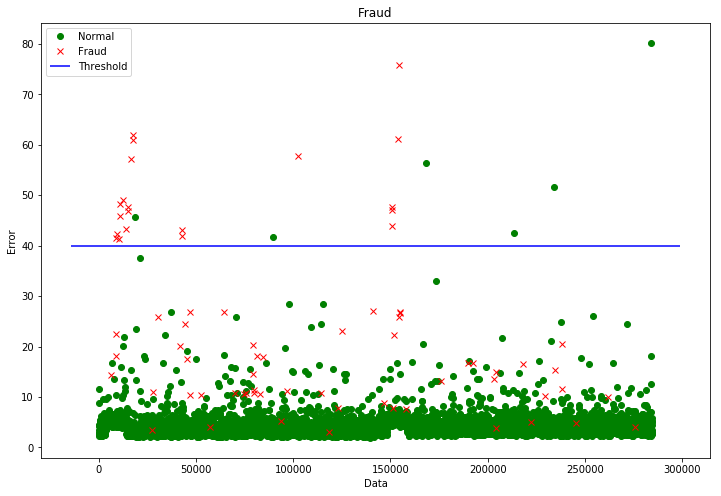

In [72]:
vh = VisualizationHelper()
vh.draw_anomaly(y_test,error,new_threshold)

Model Deployment in Watson Machine Learning
----------------

In [73]:
wml_credentials={
  "apikey": "VEGbcs6yHJqjasiZewa140cupWJDhBaBnuLly-kQAvQ3",
  "iam_apikey_description": "Auto-generated for key 510df8a1-4294-40b4-b497-07a6eb94c6af",
  "iam_apikey_name": "WMLService credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/7220c4d9d92837af58fa9dc4fe6097a7::serviceid:ServiceId-aba24763-b08c-4dea-b3f7-913a2bae91eb",
  "instance_id": "5b0175cf-77a2-4aa7-8a78-9c2aa4ddcac0",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [74]:
save_path = "CreditCardAnomolyDetecttion.h5"
autoencoder.save(save_path)


In [75]:
!tar -zcvf CreditCardAnomolyDetection.tgz CreditCardAnomolyDetecttion.h5

CreditCardAnomolyDetecttion.h5


In [76]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 542kB 8.8MB/s eta 0:00:01     |██████████████████████▋         | 378kB 8.8MB/s eta 0:00:01
  Found existing installation: watson-machine-learning-client 1.0.376
    Uninstalling watson-machine-learning-client-1.0.376:
      Successfully uninstalled watson-machine-learning-client-1.0.376


In [77]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-15 12:00:58,737 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [78]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [79]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Srinivasan Subramaniam", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "srinivsu@in.ibm.com", 
               client.repository.ModelMetaNames.NAME: "CreditCardAnom_IsolationForest_Keras",
               client.repository.ModelMetaNames.FRAMEWORK_NAME: "tensorflow",
               client.repository.ModelMetaNames.FRAMEWORK_VERSION: "1.15" ,
               client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{"name": "keras", "version": "2.2.5"}]
              }

In [80]:
published_model = client.repository.store_model(model="CreditCardAnomolyDetection.tgz", meta_props=model_props)

In [81]:
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

In [82]:
print(model_details)

{'metadata': {'guid': 'b29745f4-dd8a-4405-ac18-a4093ddf56c1', 'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/5b0175cf-77a2-4aa7-8a78-9c2aa4ddcac0/published_models/b29745f4-dd8a-4405-ac18-a4093ddf56c1', 'created_at': '2020-06-15T12:01:02.176Z', 'modified_at': '2020-06-15T12:01:02.247Z'}, 'entity': {'runtime_environment': 'None Provided', 'learning_configuration_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/5b0175cf-77a2-4aa7-8a78-9c2aa4ddcac0/published_models/b29745f4-dd8a-4405-ac18-a4093ddf56c1/learning_configuration', 'author': {'name': 'Srinivasan Subramaniam'}, 'name': 'CreditCardAnom_IsolationForest_Keras', 'learning_iterations_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/5b0175cf-77a2-4aa7-8a78-9c2aa4ddcac0/published_models/b29745f4-dd8a-4405-ac18-a4093ddf56c1/learning_iterations', 'feedback_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/5b0175cf-77a2-4aa7-8a78-9c2aa4ddcac0/published_models/b29745f4-dd8a-4405-ac18-a4093ddf56c1/feedba

In [83]:
client.deployments.list()

----  ----  ----  -----  -------  ---------  -------------
GUID  NAME  TYPE  STATE  CREATED  FRAMEWORK  ARTIFACT TYPE
----  ----  ----  -----  -------  ---------  -------------


In [84]:
created_deployment = client.deployments.create(published_model_uid, name="CreditCardAnom_IsolationForest_Keras")



#######################################################################################

Synchronous deployment creation for uid: 'b29745f4-dd8a-4405-ac18-a4093ddf56c1' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e04aa273-3a55-4a2d-b16b-7c16c5a46540'
------------------------------------------------------------------------------------------------




In [85]:
#scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint = created_deployment['entity']['scoring_url']
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/5b0175cf-77a2-4aa7-8a78-9c2aa4ddcac0/deployments/e04aa273-3a55-4a2d-b16b-7c16c5a46540/online
